In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

In [3]:
songs = pd.read_csv('./datasets/songs_info3.csv', on_bad_lines='skip')

In [4]:
songs

,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,...,Live,Loud,Key,Time Signature,Added At,Spotify Track Id,Album Label,Camelot,Spotify Track Img,Song Preview
0,1,Imagine - Remastered 2010,John Lennon,78,76,"beatlesque, classic rock, rock","Folk/Acoustic, Rock",Imagine,1971-09-09,03:07,...,0,-12,C Major,4,2023-10-04,7pKfPomDEeI4TPT6EOYjn9,EMI Catalogue,8B,NaN,https://i.scdn.co/image/ab67616d00004851995815...
1,2,A Whiter Shade of Pale - Original Single Version,Procol Harum,68,150,"album rock, art rock, blues rock, british blue...","Rock, Blues, Folk/Acoustic",Hits'n'Flips,2019-05-03,04:08,...,0,-7,C Major,4,2023-10-04,7DsQgIwg23u9gooCxkRTu3,Fly Records,8B,https://p.scdn.co/mp3-preview/0221204227043fdf...,https://i.scdn.co/image/ab67616d000048519021d7...
2,3,My Sweet Lord - 2014 Remaster,George Harrison,76,121,"album rock, beatlesque, classic rock, folk roc...","Rock, Folk/Acoustic",All Things Must Pass (2014 Remaster),1970-11-20,04:41,...,0,-9,C♯/D♭ Minor,4,2023-10-04,6vE90mi4yKsQGY3YD2OOv1,BMG Rights Management (US) LLC,12A,https://p.scdn.co/mp3-preview/ea54d9aebcc7ecf5...,https://i.scdn.co/image/ab67616d000048518a162c...
3,4,God Only Knows - Mono / Remastered 1997,The Beach Boys,0,117,"baroque pop, classic rock, folk rock, mellow g...","Pop, Rock",Top Hits 60's,2023-10-03,02:53,...,0,-8,F#/G♭ Minor,4,2023-10-04,6ZXkIS5ZVXxARAsRt9VLXE,UME - Global Clearing House,11A,NaN,https://i.scdn.co/image/ab67616d00004851dba5ac...
4,5,Bridge Over Troubled Water,Simon & Garfunkel,71,80,"classic rock, folk, folk rock, melancholia, me...","Rock, Folk/Acoustic",Bridge Over Troubled Water,1970-01-26,04:53,...,10,-14,D#/E♭ Major,4,2023-10-04,6l8EbYRtQMgKOyc1gcDHF9,Columbia,5B,https://p.scdn.co/mp3-preview/e80a149b25c33d4e...,https://i.scdn.co/image/ab67616d00004851ba7fe7...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,690,She's A Rainbow,The Rolling Stones,65,109,"album rock, british invasion, classic rock, rock",Rock,She's A Rainbow / Dandelion / We Love You,2020-10-09,04:13,...,30,-7,A#/B♭ Major,4,2023-10-04,6KOtheMY0KN4s9TrQHr9It,"ABKCO Music & Records, Inc.",6B,NaN,https://i.scdn.co/image/ab67616d00004851b98f37...
688,691,If You Ever,"East 17,GABRIELLE",31,140,"boy band, europop, british soul, new wave pop","Pop, R&B",Dreams Can Come True - Greatest Hits Volume 1,2001-01-01,04:14,...,30,-5,C Minor,4,2023-10-04,4KPv3TQbPJUz2BjmHHph0Z,Universal-Island Records Ltd.,5A,NaN,https://i.scdn.co/image/ab67616d000048516b71d2...
689,692,"Koinu no Carnival -From Minute Waltz""-""",EHAMIC,61,142,NaN,NaN,"Classicaloid"" Chopin Musik""",2018-10-04,03:10,...,0,-8,C♯/D♭ Major,4,2023-10-04,3OP9la2QTA5artehqjFJCp,SUNRISE Music Label,3B,https://p.scdn.co/mp3-preview/019d69402407fa2c...,https://i.scdn.co/image/ab67616d00004851f28296...
690,693,Never Forget You,"Zara Larsson,MNEK",74,146,"pop, scandipop, swedish electropop, swedish po...","Electronic, Pop, R&B",So Good,2017-03-17,03:33,...,20,-6,B Minor,4,2023-10-04,6hmhG1b4LEyNuashVvuIAo,Epic/Record Company TEN,10A,https://p.scdn.co/mp3-preview/ee5474924adea2b9...,https://i.scdn.co/image/ab67616d000048519e1683...


In [5]:
songs.columns

Index(['#', 'Song', 'Artist', 'Popularity', 'BPM', 'Genres', 'Parent Genres',
       'Album', 'Album Date', 'Time', 'Dance', 'Energy', 'Acoustic',
       'Instrumental', 'Happy', 'Speech', 'Live', 'Loud', 'Key',
       'Time Signature', 'Added At', 'Spotify Track Id', 'Album Label',
       'Camelot', 'Spotify Track Img', 'Song Preview'],
      dtype='object')

In [6]:
songs.dtypes

#                     int64
Song                 object
Artist               object
Popularity            int64
BPM                   int64
Genres               object
Parent Genres        object
Album                object
Album Date           object
Time                 object
Dance                 int64
Energy                int64
Acoustic              int64
Instrumental          int64
Happy                 int64
Speech                int64
Live                  int64
Loud                  int64
Key                  object
Time Signature        int64
Added At             object
Spotify Track Id     object
Album Label          object
Camelot              object
Spotify Track Img    object
Song Preview         object
dtype: object

In [7]:
songs.shape

(692, 26)

In [8]:
songs_clean = songs.drop(['#','Genres','Key','Time Signature','Added At','Spotify Track Id','Camelot','Song Preview'], axis='columns')

In [10]:
# Using pandas.Series.dt.year()
songs['Album Date'] = songs['Album Date'].dt.year  

AttributeError: Can only use .dt accessor with datetimelike values

In [11]:
songs_clean.head()

,Song,Artist,Popularity,BPM,Parent Genres,Album,Album Date,Time,Dance,Energy,Acoustic,Instrumental,Happy,Speech,Live,Loud,Album Label,Spotify Track Img
0,Imagine - Remastered 2010,John Lennon,78,76,"Folk/Acoustic, Rock",Imagine,1971-09-09,03:07,55,26,91,18,17,0,0,-12,EMI Catalogue,NaN
1,A Whiter Shade of Pale - Original Single Version,Procol Harum,68,150,"Rock, Blues, Folk/Acoustic",Hits'n'Flips,2019-05-03,04:08,25,66,51,0,43,0,0,-7,Fly Records,https://p.scdn.co/mp3-preview/0221204227043fdf...
2,My Sweet Lord - 2014 Remaster,George Harrison,76,121,"Rock, Folk/Acoustic",All Things Must Pass (2014 Remaster),1970-11-20,04:41,54,69,8,0,55,0,0,-9,BMG Rights Management (US) LLC,https://p.scdn.co/mp3-preview/ea54d9aebcc7ecf5...
3,God Only Knows - Mono / Remastered 1997,The Beach Boys,0,117,"Pop, Rock",Top Hits 60's,2023-10-03,02:53,52,49,25,0,48,0,0,-8,UME - Global Clearing House,NaN
4,Bridge Over Troubled Water,Simon & Garfunkel,71,80,"Rock, Folk/Acoustic",Bridge Over Troubled Water,1970-01-26,04:53,15,21,82,0,26,0,10,-14,Columbia,https://p.scdn.co/mp3-preview/e80a149b25c33d4e...


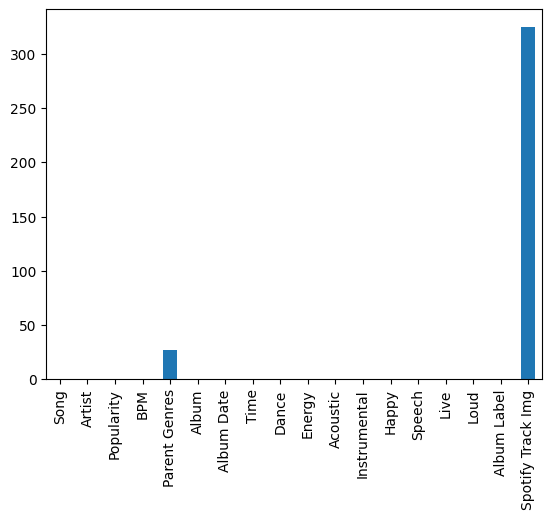

In [12]:
songs_clean.isnull().sum().plot.bar()
plt.show()

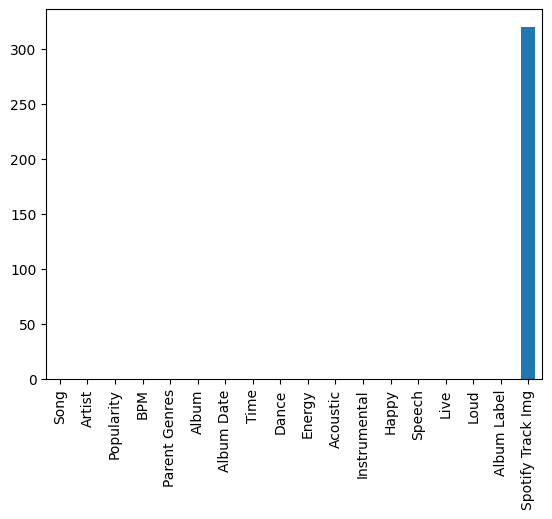

In [13]:
songs_clean.dropna(subset = ['Parent Genres'], inplace=True)
songs_clean.isnull().sum().plot.bar()
plt.show()

In [14]:
songs_clean['Song'].nunique(), songs_clean.shape

(623, (665, 18))

In [15]:
songs_clean = songs_clean.sort_values(by=['Popularity'], ascending=False)
songs_clean.drop_duplicates(subset=['Song'], keep='first', inplace=True)

In [16]:
ints = []
for col in songs_clean.columns:
  if songs_clean[col].dtype == 'int64':
    ints.append(col)
 
len(ints)

10

In [17]:
songs_clean.dtypes

Song                 object
Artist               object
Popularity            int64
BPM                   int64
Parent Genres        object
Album                object
Album Date           object
Time                 object
Dance                 int64
Energy                int64
Acoustic              int64
Instrumental          int64
Happy                 int64
Speech                int64
Live                  int64
Loud                  int64
Album Label          object
Spotify Track Img    object
dtype: object

/var/folders/bc/10n93dns7k7cwzf7txmb7tmm0000gn/T/ipykernel_14685/3557063256.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, i + 1)
/var/folders/bc/10n93dns7k7cwzf7txmb7tmm0000gn/T/ipykernel_14685/3557063256.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(songs_clean[col])
/var/folders/bc/10n93dns7k7cwzf7txmb7tmm0000gn/T/ipykernel_14685/3557063256.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (

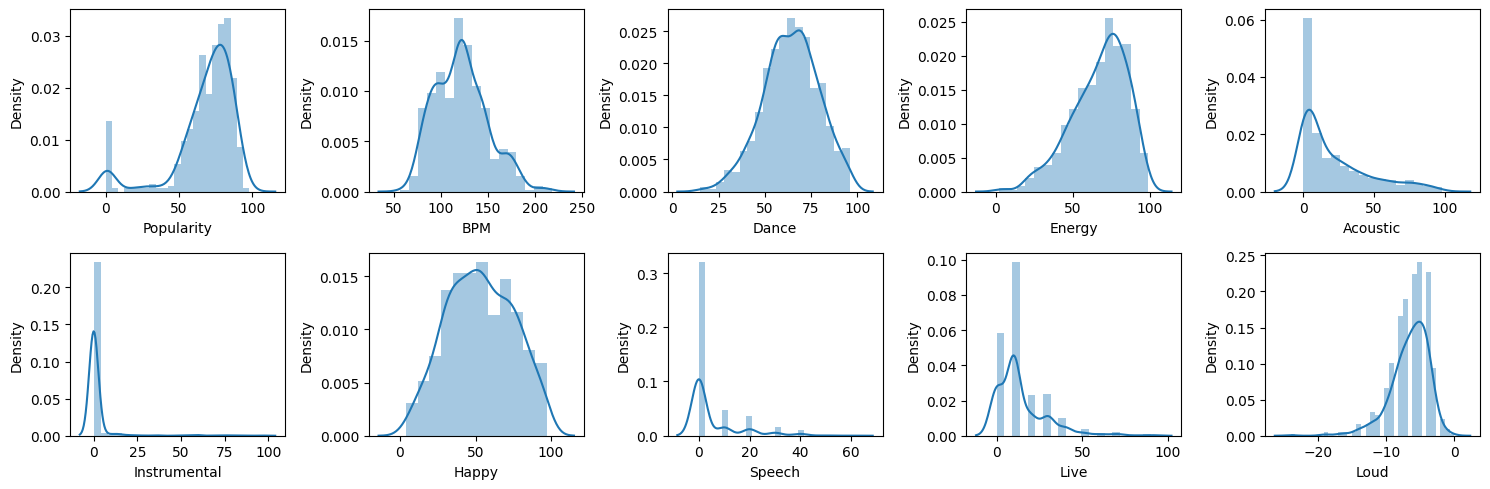

In [18]:
plt.subplots(figsize = (15, 5))
for i, col in enumerate(ints):
  plt.subplot(2, 5, i + 1)
  sb.distplot(songs_clean[col])
plt.tight_layout()
plt.show()

In [31]:
%%capture
song_vectorizer = CountVectorizer()
song_vectorizer.fit(songs_clean['Parent Genres'])

In [21]:
def get_similarities(song_name, data):
   
  # Getting vector for the input song.
  text_array1 = song_vectorizer.transform(data[data['Song']==song_name]['Parent Genres']).toarray()
  num_array1 = data[data['Song']==song_name].select_dtypes(include=np.number).to_numpy()
   
  # We will store similarity for each row of the dataset.
  sim = []
  for idx, row in data.iterrows():
    name = row['Song']
     
    # Getting vector for current song.
    text_array2 = song_vectorizer.transform(data[data['Song']==name]['Parent Genres']).toarray()
    num_array2 = data[data['Song']==name].select_dtypes(include=np.number).to_numpy()
 
    # Calculating similarities for text as well as numeric features
    text_sim = cosine_similarity(text_array1, text_array2)[0][0]
    num_sim = cosine_similarity(num_array1, num_array2)[0][0]
    sim.append(text_sim + num_sim)
     
  return sim

In [22]:
def recommend_songs(song_name, data=songs_clean):
  # Base case
  if songs_clean[songs_clean['Song'] == song_name].shape[0] == 0:
    print('This song is either not so popular or you\
    have entered invalid_name.\n Some songs you may like:\n')
     
    for song in data.sample(n=5)['Song'].values:
      print(song)
    return
   
  data['similarity_factor'] = get_similarities(song_name, data)
 
  data.sort_values(by=['similarity_factor', 'Popularity'],
                   ascending = [False, False],
                   inplace=True)
   
  # First song will be the input song itself as the similarity will be highest.
  display(data[['Song', 'Artist']][2:7])

In [23]:
recommend_songs('Shape of You')

,Song,Artist
466,Calm Down,Rema
209,Obsessed,"Riar Saab,Abhijay Sharma"
624,I'm Not The Only One - Radio Edit,Sam Smith
540,Late Night Talking,Harry Styles
516,Peru,"Fireboy DML,Ed Sheeran"


In [24]:
recommend_songs('Sorry')

,Song,Artist
672,Can't Feel My Face,The Weeknd
147,Good Enough,Dodgy
564,Ghost,Justin Bieber
158,Give Me A Little More Time,GABRIELLE
359,Waffle House,Jonas Brothers


In [ ]:
recommend_songs('Love me like you do')

This song is either not so popular or you    have entered invalid_name.
 Some songs you may like:

Rich Flex
Sorry
Let It Be - Remastered 2009
Fire Water Burn
Bye


In [25]:
songs_clean.head()

,Song,Artist,Popularity,BPM,Parent Genres,Album,Album Date,Time,Dance,Energy,Acoustic,Instrumental,Happy,Speech,Live,Loud,Album Label,Spotify Track Img,similarity_factor
680,Sorry,Justin Bieber,2,100,Pop,Si torna a scuola! Canzoni per bambini,2023-09-28,03:20,68,75,9,0,44,0,30,-4,UME - Global Clearing House,NaN,2.000000
476,Mountain,Sam Ryder,0,91,Pop,2023 Pop,2023-09-22,02:49,61,78,11,0,35,0,10,-3,Warner Music Group - X5 Music Group,https://p.scdn.co/mp3-preview/c76045c1c0512e38...,1.988885
672,Can't Feel My Face,The Weeknd,0,108,"R&B, Pop",Girls Night Out: The Classics,2023-10-04,03:33,71,77,12,0,61,0,10,-6,UME - Global Clearing House,NaN,1.986652
147,Good Enough,Dodgy,24,112,Pop,Ace A's + Killer B's,1998-01-01,03:59,58,96,0,0,75,0,30,-6,EMI,NaN,1.973177
564,Ghost,Justin Bieber,0,154,Pop,Winter Love 2023,2023-09-30,02:33,60,74,18,0,47,0,40,-6,UME - Global Clearing House,NaN,1.973007


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Step 1: Split the dataset into training and testing sets
train_data, test_data = train_test_split(songs_clean, test_size=0.2, random_state=42)


In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_recommendation_system(test_data, top_n=5):
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for idx, input_song in test_data.iterrows():
        recommended_songs = recommend_songs(input_song['Song'], songs_clean)
        
        # Extract the ground truth (songs actually liked by the user)
        ground_truth_songs = test_data[test_data['Song'] == input_song['Song']]['Song'].values

        # Calculate metrics
        precision = len(set(recommended_songs) & set(ground_truth_songs)) / top_n
        recall = len(set(recommended_songs) & set(ground_truth_songs)) / len(ground_truth_songs)
        if precision + recall != 0:
            f1 = (2 * precision * recall) / (precision + recall)
        else:
            f1 = 0
        
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

    # Calculate the average metrics over all test samples
    avg_precision = sum(precision_scores) / len(precision_scores)
    avg_recall = sum(recall_scores) / len(recall_scores)
    avg_f1 = sum(f1_scores) / len(f1_scores)

    return avg_precision, avg_recall, avg_f1


In [28]:
# Set the top-n value for recommendations
top_n = 5

# Evaluate the recommendation system
avg_precision, avg_recall, avg_f1 = evaluate_recommendation_system(test_data, top_n)


,Song,Artist
325,ceilings,Lizzy McAlpine
610,Wings,Birdy
149,Let's Make A Night To Remember,Bryan Adams
91,Have You Ever Really Loved A Woman? - From Don...,Bryan Adams
130,Novocaine For The Soul,Eels


TypeError: 'NoneType' object is not iterable

In [29]:
def evaluate_recommendation_system(test_data, top_n=5):
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for idx, input_song in test_data.iterrows():
        recommended_songs = recommend_songs(input_song['Song'], songs_clean)
        
        if recommended_songs is not None:
            ground_truth_songs = test_data[test_data['Song'] == input_song['Song']]['Song'].values

            precision = len(set(recommended_songs) & set(ground_truth_songs)) / top_n
            recall = len(set(recommended_songs) & set(ground_truth_songs)) / len(ground_truth_songs)
            if precision + recall != 0:
                f1 = (2 * precision * recall) / (precision + recall)
            else:
                f1 = 0
            
            precision_scores.append(precision)
            recall_scores.append(recall)
            f1_scores.append(f1)
        else:
            precision_scores.append(0)
            recall_scores.append(0)
            f1_scores.append(0)

    # Calculate the average metrics over all test samples
    avg_precision = sum(precision_scores) / len(precision_scores)
    avg_recall = sum(recall_scores) / len(recall_scores)
    avg_f1 = sum(f1_scores) / len(f1_scores)

    return avg_precision, avg_recall, avg_f1

In [35]:
top_n = 5

# Evaluate the recommendation system
avg_precision, avg_recall, avg_f1 = evaluate_recommendation_system(test_data, top_n)

print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1)

,Song,Artist
325,ceilings,Lizzy McAlpine
610,Wings,Birdy
149,Let's Make A Night To Remember,Bryan Adams
91,Have You Ever Really Loved A Woman? - From Don...,Bryan Adams
130,Novocaine For The Soul,Eels


,Song,Artist
110,Burden In My Hand,Soundgarden
7,All Along the Watchtower,Jimi Hendrix
88,One Headlight,The Wallflowers
47,Smoke On The Water - Remastered 2012,Deep Purple
81,1979 - Remastered 2012,The Smashing Pumpkins


,Song,Artist
315,REACT,"Switch Disco,Ella Henderson,Robert Miles"
647,Easy Love,Sigala
664,Runaway (U & I),Galantis
324,Sad in the Summer (feat. Lily Rose),"Diplo,Lily Rose"
353,Live Without Love,"Shouse,David Guetta"


,Song,Artist
486,Forget Me,Lewis Capaldi
318,How I'm Feeling Now,Lewis Capaldi
540,Late Night Talking,Harry Styles
466,Calm Down,Rema
313,Wish You The Best,Lewis Capaldi


,Song,Artist
380,We Ride,Bryan Martin
470,CUFF IT,Beyoncé
163,Flowers,Miley Cyrus
676,Want to Want Me,Jason Derulo
231,Perfume,NCT DOJAEJUNG


,Song,Artist
493,"Soweto (with Don Toliver, Rema & Tempoe)","Victony,Rema,Tempoe,Don Toliver"
465,Private Landing (feat. Justin Bieber & Future),"Don Toliver,Justin Bieber,Future"
282,The Monster,"Eminem,Rihanna"
539,STAY (with Justin Bieber),"The Kid LAROI,Justin Bieber"
292,Smack That,"Akon,Eminem"


,Song,Artist
414,Dancin’ In The Country,Tyler Hubbard
3,God Only Knows - Mono / Remastered 1997,The Beach Boys
369,Your Heart Or Mine,Jon Pardi
73,Make Me Smile (Come up and See Me) - 2014 Rema...,"Steve Harley,Steve Harley & Cockney Rebel"
328,Somethin' Bout You,Mickey Guyton


,Song,Artist
79,Freed From Desire,Gala
521,Where Are You Now,"Lost Frequencies,Calum Scott"
607,All Cried Out (feat. Alex Newell) - Radio Edit,"Blonde,Alex Newell"
644,Waiting For Love,Avicii
617,Rather Be (feat. Jess Glynne),"Clean Bandit,Jess Glynne"


,Song,Artist
172,El Azul,"Junior H,Peso Pluma"
183,AMG,"Natanael Cano,Peso Pluma,Gabito Ballesteros"
440,Bebe Dame,"Fuerza Regida,Grupo Frontera"
452,Que Vuelvas,"Carin Leon,Grupo Frontera"
160,un x100to,"Grupo Frontera,Bad Bunny"


,Song,Artist
623,Real Love,"Clean Bandit,Jess Glynne"
361,How Does It Feel - Boris Way Remix,"Tom Grennan,Boris Way"
632,Gravity (feat. Ella Eyre) - Radio Edit,"DJ Fresh,Ella Eyre"
324,Sad in the Summer (feat. Lily Rose),"Diplo,Lily Rose"
647,Easy Love,Sigala


,Song,Artist
306,Tragic Endings (feat. Skylar Grey),"Eminem,Skylar Grey"
681,Lean On (feat. MØ & DJ Snake),"Major Lazer,MØ,DJ Snake"
548,"BMW - French The Kid, MIST, Bugzy Malone Remix","Bad Boy Chiller Crew,MIST,Bugzy Malone,French ..."
550,IFTK,"Tion Wayne,La Roux"
583,Do It To It,"ACRAZE,Cherish"


,Song,Artist
686,Baby Love,The Supremes
523,"We Don't Talk About Bruno - From Encanto""/Soun...","Carolina Gaitán - La Gaita,Mauro Castillo,Adas..."
61,White Christmas - 1947 Version,"Bing Crosby,Ken Darby Singers,John Scott Trott..."
29,Be My Baby,The Ronettes
596,Baby Shark,Pinkfong


,Song,Artist
3,God Only Knows - Mono / Remastered 1997,The Beach Boys
100,If You Could Only See,Tonic
110,Burden In My Hand,Soundgarden
73,Make Me Smile (Come up and See Me) - 2014 Rema...,"Steve Harley,Steve Harley & Cockney Rebel"
383,LosT,Bring Me The Horizon


,Song,Artist
613,Heartbeat Song,Kelly Clarkson
554,Overpass Graffiti,Ed Sheeran
373,Giving Up On That,Dalton Dover
332,Here,Tom Grennan
637,Fight Song,Rachel Platten


,Song,Artist
359,Waffle House,Jonas Brothers
476,Mountain,Sam Ryder
680,Sorry,Justin Bieber
338,Heart Wants What It Wants,Bebe Rexha
147,Good Enough,Dodgy


,Song,Artist
686,Baby Love,The Supremes
61,White Christmas - 1947 Version,"Bing Crosby,Ken Darby Singers,John Scott Trott..."
578,"The Family Madrigal - From Encanto""/Soundtrack...","Stephanie Beatriz,Olga Merediz,Encanto - Cast"
43,You Send Me - Digitally Remastered,Sam Cooke
546,"Surface Pressure - From Encanto""/Soundtrack Ve...",Jessica Darrow


,Song,Artist
522,Seventeen Going Under,Sam Fender
120,Barely Breathing,Duncan Sheik
22,One,U2
154,Spaceman,Babylon Zoo
9,“Heroes” - Single Version; 2014 Remaster,David Bowie


,Song,Artist
315,REACT,"Switch Disco,Ella Henderson,Robert Miles"
555,Remember,"Becky Hill,David Guetta"
565,Ferrari,"James Hype,Miggy Dela Rosa"
601,Cheerleader - Felix Jaehn Remix Radio Edit,"OMI,Felix Jaehn"
528,Where Did You Go? (feat. MNEK),"Jax Jones,MNEK"


,Song,Artist
328,Somethin' Bout You,Mickey Guyton
665,The Nights,Avicii
647,Easy Love,Sigala
326,I'm Not Here To Make Friends,"Sam Smith,Calvin Harris,Jessie Reyez"
487,Side Effects,"Becky Hill,Lewis Thompson"


,Song,Artist
372,All Of The Girls You Loved Before,Taylor Swift
662,Bloodstream,Ed Sheeran
499,Someone You Loved,Lewis Capaldi
624,I'm Not The Only One - Radio Edit,Sam Smith
570,Happier Than Ever,Billie Eilish


,Song,Artist
305,Bad Guy,Eminem
288,White America,Eminem
261,Unaccommodating (feat. Young M.A),"Eminem,Young M.A"
278,Like Toy Soldiers,Eminem
297,25 To Life,Eminem


,Song,Artist
472,Life Goes On,Ed Sheeran
63,I Will Always Love You,Whitney Houston
517,go,Cat Burns
372,All Of The Girls You Loved Before,Taylor Swift
192,Until I Found You (with Em Beihold) - Em Beiho...,"Stephen Sanchez,Em Beihold"


,Song,Artist
607,All Cried Out (feat. Alex Newell) - Radio Edit,"Blonde,Alex Newell"
617,Rather Be (feat. Jess Glynne),"Clean Bandit,Jess Glynne"
644,Waiting For Love,Avicii
647,Easy Love,Sigala
601,Cheerleader - Felix Jaehn Remix Radio Edit,"OMI,Felix Jaehn"


,Song,Artist
189,Here With Me,d4vd
188,Acróstico,Shakira
533,Easy On Me,Adele
372,All Of The Girls You Loved Before,Taylor Swift
499,Someone You Loved,Lewis Capaldi


,Song,Artist
423,Under The Influence,Chris Brown
207,Mockingbird,Eminem
297,25 To Life,Eminem
276,Beautiful,Eminem
257,The Way I Am,Eminem


,Song,Artist
150,Hit Me Off,New Edition
282,The Monster,"Eminem,Rihanna"
300,Forever,"Drake,Kanye West,Lil Wayne,Eminem"
493,"Soweto (with Don Toliver, Rema & Tempoe)","Victony,Rema,Tempoe,Don Toliver"
606,Worth It (feat. Kid Ink),"Fifth Harmony,Kid Ink"


,Song,Artist
251,The Real Slim Shady,Eminem
263,From The D 2 The LBC (with Snoop Dogg),"Eminem,Snoop Dogg"
279,Shake That,"Eminem,Nate Dogg"
658,Ayo,"Chris Brown,Tyga"
595,Lost,Frank Ocean


,Song,Artist
641,Do It Again,"Pia Mia,Chris Brown,Tyga"
655,Hotline Bling,Drake
619,Trouble,"Iggy Azalea,Jennifer Hudson"
465,Private Landing (feat. Justin Bieber & Future),"Don Toliver,Justin Bieber,Future"
634,"I Don't Like It, I Love It (feat. Robin Thicke...","Flo Rida,Robin Thicke,Verdine White"


,Song,Artist
190,Angels Like You,Miley Cyrus
198,Cruel Summer,Taylor Swift
652,Drag Me Down,One Direction
497,Satellite,Harry Styles
442,Nonsense,Sabrina Carpenter


,Song,Artist
151,Insomnia - Radio Edit,Faithless
636,What I Did for Love (feat. Emeli Sandé),David Guetta
353,Live Without Love,"Shouse,David Guetta"
660,Up (feat. Demi Lovato) - Wideboys Radio Mix,"Olly Murs,Demi Lovato,Wideboys"
608,Lay It All on Me (feat. Ed Sheeran),"Rudimental,Ed Sheeran"


,Song,Artist
172,El Azul,"Junior H,Peso Pluma"
205,El Gordo Trae El Mando,Chino Pacas
183,AMG,"Natanael Cano,Peso Pluma,Gabito Ballesteros"
170,PRC,"Peso Pluma,Natanael Cano"
208,Frágil,"Yahritza Y Su Esencia,Grupo Frontera"


,Song,Artist
687,She's A Rainbow,The Rolling Stones
37,Don't Stop Believin',Journey
220,Mama ŠČ!,Let 3
154,Spaceman,Babylon Zoo
68,Suspicious Minds,Elvis Presley


,Song,Artist
58,Bad Moon Rising,Creedence Clearwater Revival
36,If You Leave Me Now,Chicago
576,Dreams - 2004 Remaster,Fleetwood Mac
40,Jump - 2015 Remaster,Van Halen
590,Everywhere - 2017 Remaster,Fleetwood Mac


,Song,Artist
320,Eyes Closed,Ed Sheeran
190,Angels Like You,Miley Cyrus
501,live more & love more,Cat Burns
236,Évidemment,La Zarra
400,Anti-Hero,Taylor Swift


,Song,Artist
227,Bye,Aditya Bhardwaj
549,Blinding Lights,The Weeknd
307,Wreckage,Nate Smith
473,Can't Tame Her,Zara Larsson
312,Curtains,Ed Sheeran


,Song,Artist
163,Flowers,Miley Cyrus
652,Drag Me Down,One Direction
556,Anyone For You (Tiger Lily),George Ezra
540,Late Night Talking,Harry Styles
678,Sugar,Maroon 5


,Song,Artist
13,Let It Be - Remastered 2009,The Beatles
52,Morning Has Broken - Remastered 2021,Yusuf / Cat Stevens
72,Hey Jude - Remastered 2015,The Beatles
685,Heart Of Gold,Neil Young
2,My Sweet Lord - 2014 Remaster,George Harrison


,Song,Artist
581,Wonderwall - Remastered,Oasis
149,Let's Make A Night To Remember,Bryan Adams
87,Don't Look Back In Anger - Remastered,Oasis
77,Ironic - 2015 Remaster,Alanis Morissette
115,One Of Us - Short Version,Joan Osborne


,Song,Artist
465,Private Landing (feat. Justin Bieber & Future),"Don Toliver,Justin Bieber,Future"
422,Snooze,SZA
539,STAY (with Justin Bieber),"The Kid LAROI,Justin Bieber"
433,Rich Flex,"Drake,21 Savage"
655,Hotline Bling,Drake


,Song,Artist
355,Haven't You Ever Been In Love Before?,Lewis Capaldi
319,TRUSTFALL,P!nk
580,Music For a Sushi Restaurant,Harry Styles
366,Fantasy (with GAYLE & Em Beihold),"Lauren Spencer Smith,GAYLE,Em Beihold"
615,Bad Blood,Taylor Swift


,Song,Artist
91,Have You Ever Really Loved A Woman? - From Don...,Bryan Adams
519,Running Up That Hill (A Deal With God),Kate Bush
44,California Dreamin' - Single Version,The Mamas & The Papas
77,Ironic - 2015 Remaster,Alanis Morissette
605,Someone New,Hozier


,Song,Artist
72,Hey Jude - Remastered 2015,The Beatles
67,Knockin' On Heaven's Door,Bob Dylan
479,Creep,Radiohead
685,Heart Of Gold,Neil Young
27,Waterloo Sunset - Mono Version,The Kinks


,Song,Artist
120,Barely Breathing,Duncan Sheik
8,Hotel California - 2013 Remaster,Eagles
23,Light My Fire,The Doors
538,Mr. Brightside,The Killers
58,Bad Moon Rising,Creedence Clearwater Revival


,Song,Artist
548,"BMW - French The Kid, MIST, Bugzy Malone Remix","Bad Boy Chiller Crew,MIST,Bugzy Malone,French ..."
344,Favorite Song,Toosii
491,Energy,Digga D
526,Starlight,Dave
541,Overseas,"D-Block Europe,Central Cee"


,Song,Artist
649,Locked Away (feat. Adam Levine),"R. City,Adam Levine"
374,UNHEALTHY (feat. Shania Twain),"Anne-Marie,Shania Twain"
317,Out Of That Truck,Carrie Underwood
429,Wild as Her,Corey Kent
443,Cowgirls (feat. ERNEST),"Morgan Wallen,ERNEST"


,Song,Artist
444,Low Down,Lil Baby
267,The Ringer,Eminem
254,Lucky You (feat. Joyner Lucas),"Eminem,Joyner Lucas"
273,Sing For The Moment,Eminem
595,Lost,Frank Ocean


,Song,Artist
392,Never Gonna Not Dance Again,P!nk
74,Wannabe,Spice Girls
586,Woman,Doja Cat
231,Perfume,NCT DOJAEJUNG
102,Where Do You Go,No Mercy


,Song,Artist
106,How Bizarre,OMC
486,Forget Me,Lewis Capaldi
542,Bam Bam (feat. Ed Sheeran),"Camila Cabello,Ed Sheeran"
563,Fingers Crossed,Lauren Spencer Smith
529,abc (nicer),GAYLE


,Song,Artist
275,Forgot About Dre,"Dr. Dre,Eminem"
142,Cold Rock a Party,MC Lyte
253,Is This Love ('09) (feat. 50 Cent),"Eminem,50 Cent"
279,Shake That,"Eminem,Nate Dogg"
609,"Downtown (feat. Melle Mel, Grandmaster Caz, Ko...","Macklemore & Ryan Lewis,Macklemore,Ryan Lewis,..."


,Song,Artist
80,Lovefool,The Cardigans
115,One Of Us - Short Version,Joan Osborne
379,When Love Sucks (feat. Dido),"Jason Derulo,Dido"
95,You Oughta Know - 2015 Remaster,Alanis Morissette
605,Someone New,Hozier


,Song,Artist
688,If You Ever,"East 17,GABRIELLE"
564,Ghost,Justin Bieber
672,Can't Feel My Face,The Weeknd
338,Heart Wants What It Wants,Bebe Rexha
158,Give Me A Little More Time,GABRIELLE


,Song,Artist
299,Bitch Please II,"Eminem,Dr. Dre,Snoop Dogg,Xzibit,Nate Dogg"
232,Solo,BLANKA
620,Somebody,"Natalie La Rose,Jeremih"
576,Dreams - 2004 Remaster,Fleetwood Mac
148,Sittin' Up In My Room - from Waiting to Exhale...,Brandy


,Song,Artist
284,Crack A Bottle,"Eminem,Dr. Dre,50 Cent"
273,Sing For The Moment,Eminem
304,Guilty Conscience,"Eminem,Dr. Dre"
296,Drop The World,"Lil Wayne,Eminem"
309,Need A Favor,Jelly Roll


,Song,Artist
270,Without Me,Eminem
268,Venom - Music From The Motion Picture,Eminem
609,"Downtown (feat. Melle Mel, Grandmaster Caz, Ko...","Macklemore & Ryan Lewis,Macklemore,Ryan Lewis,..."
283,Space Bound,Eminem
423,Under The Influence,Chris Brown


,Song,Artist
247,Somebody's Pleasure - Sped Up,Aziz Hedra
533,Easy On Me,Adele
322,Never Be Mine,Rosa Linn
508,A Year Ago,James Arthur
189,Here With Me,d4vd


,Song,Artist
483,Healing,Tion Wayne
254,Lucky You (feat. Joyner Lucas),"Eminem,Joyner Lucas"
255,Cleanin' Out My Closet,Eminem
185,All My Life (feat. J. Cole),"Lil Durk,J. Cole"
432,Superhero (Heroes & Villains) [with Future & C...,"Metro Boomin,Future,Chris Brown"


,Song,Artist
392,Never Gonna Not Dance Again,P!nk
657,Don't Be so Hard on Yourself,Jess Glynne
393,Eyes On You,Nicky Youre
545,BREAK MY SOUL,Beyoncé
515,Bad Habits,Ed Sheeran


,Song,Artist
101,Change the World,Eric Clapton
42,Wonderful Tonight,Eric Clapton
1,A Whiter Shade of Pale - Original Single Version,Procol Harum
20,Tears in Heaven - Acoustic Live,Eric Clapton
48,All You Need Is Love - Remastered 2009,The Beatles


,Song,Artist
371,Baby Don't Hurt Me,"David Guetta,Anne-Marie,Coi Leray"
677,Where Are Ü Now (with Justin Bieber),"Jack Ü,Skrillex,Diplo,Justin Bieber"
681,Lean On (feat. MØ & DJ Snake),"Major Lazer,MØ,DJ Snake"
282,The Monster,"Eminem,Rihanna"
493,"Soweto (with Don Toliver, Rema & Tempoe)","Victony,Rema,Tempoe,Don Toliver"


,Song,Artist
580,Music For a Sushi Restaurant,Harry Styles
553,Perfect,Ed Sheeran
318,How I'm Feeling Now,Lewis Capaldi
83,Because You Loved Me (Theme from Up Close and ...,Céline Dion
190,Angels Like You,Miley Cyrus


,Song,Artist
280,Cinderella Man,Eminem
98,How Do U Want It (ft. K-Ci & JoJo),"2Pac,K-Ci & JoJo"
287,What's The Difference,"Dr. Dre,Eminem,Xzibit"
104,Only God Can Judge Me (ft. Rappin' 4-Tay),"2Pac,Rappin' 4-Tay"
127,Guess Who's Back,Rakim


,Song,Artist
208,Frágil,"Yahritza Y Su Esencia,Grupo Frontera"
452,Que Vuelvas,"Carin Leon,Grupo Frontera"
183,AMG,"Natanael Cano,Peso Pluma,Gabito Ballesteros"
172,El Azul,"Junior H,Peso Pluma"
205,El Gordo Trae El Mando,Chino Pacas


,Song,Artist
266,Godzilla (feat. Juice WRLD),"Eminem,Juice WRLD"
269,Homicide (feat. Eminem),"Logic,Eminem"
595,Lost,Frank Ocean
254,Lucky You (feat. Joyner Lucas),"Eminem,Joyner Lucas"
423,Under The Influence,Chris Brown


,Song,Artist
301,Berzerk,Eminem
263,From The D 2 The LBC (with Snoop Dogg),"Eminem,Snoop Dogg"
288,White America,Eminem
257,The Way I Am,Eminem
297,25 To Life,Eminem


,Song,Artist
392,Never Gonna Not Dance Again,P!nk
676,Want to Want Me,Jason Derulo
600,Uptown Funk (feat. Bruno Mars),"Mark Ronson,Bruno Mars"
586,Woman,Doja Cat
74,Wannabe,Spice Girls


,Song,Artist
31,Your Song,Elton John
10,In the Ghetto,Elvis Presley
17,Life on Mars? - 2015 Remaster,David Bowie
6,Stairway to Heaven - Remaster,Led Zeppelin
23,Light My Fire,The Doors


,Song,Artist
473,Can't Tame Her,Zara Larsson
227,Bye,Aditya Bhardwaj
215,GOOD LOYAL THOTS,Odetari
637,Fight Song,Rachel Platten
373,Giving Up On That,Dalton Dover


,Song,Artist
413,Thinkin’ Bout Me,Morgan Wallen
419,Thought You Should Know,Morgan Wallen
314,Fast Car,Luke Combs
34,Crazy - Single Version,"Patsy Cline,The Jordanaires"
461,Sunrise,Morgan Wallen


,Song,Artist
302,Patiently Waiting,"50 Cent,Eminem"
287,What's The Difference,"Dr. Dre,Eminem,Xzibit"
262,The Adventures of Moon Man & Slim Shady (with ...,"Kid Cudi,Eminem"
280,Cinderella Man,Eminem
297,25 To Life,Eminem


,Song,Artist
515,Bad Habits,Ed Sheeran
241,Canın Sağ Olsun,"Semicenk,Rast"
393,Eyes On You,Nicky Youre
676,Want to Want Me,Jason Derulo
204,The Planet,BTS


,Song,Artist
356,Bops,Coi Leray
279,Shake That,"Eminem,Nate Dogg"
537,First Class,Jack Harlow
254,Lucky You (feat. Joyner Lucas),"Eminem,Joyner Lucas"
441,Go Hard,Lil Baby


,Song,Artist
2,My Sweet Lord - 2014 Remaster,George Harrison
54,"Mrs. Robinson - From The Graduate"" Soundtrack""",Simon & Garfunkel
13,Let It Be - Remastered 2009,The Beatles
52,Morning Has Broken - Remastered 2021,Yusuf / Cat Stevens
21,Like a Rolling Stone,Bob Dylan


,Song,Artist
606,Worth It (feat. Kid Ink),"Fifth Harmony,Kid Ink"
282,The Monster,"Eminem,Rihanna"
292,Smack That,"Akon,Eminem"
368,I Like You (A Happier Song) (with Doja Cat),"Post Malone,Doja Cat"
131,Only You (feat. The Notorious B.I.G.) - Radio Mix,"112,The Notorious B.I.G."


,Song,Artist
510,Heart of Steel - Eurovision Version,TVORCHI
571,Riptide,Vance Joy
587,Yellow,Coldplay
73,Make Me Smile (Come up and See Me) - 2014 Rema...,"Steve Harley,Steve Harley & Cockney Rebel"
75,Don't Speak,No Doubt


,Song,Artist
172,El Azul,"Junior H,Peso Pluma"
205,El Gordo Trae El Mando,Chino Pacas
208,Frágil,"Yahritza Y Su Esencia,Grupo Frontera"
183,AMG,"Natanael Cano,Peso Pluma,Gabito Ballesteros"
170,PRC,"Peso Pluma,Natanael Cano"


,Song,Artist
540,Late Night Talking,Harry Styles
231,Perfume,NCT DOJAEJUNG
381,If We Ever Broke Up,Mae Stephens
486,Forget Me,Lewis Capaldi
661,Marvin Gaye (feat. Meghan Trainor),"Charlie Puth,Meghan Trainor"


,Song,Artist
383,LosT,Bring Me The Horizon
7,All Along the Watchtower,Jimi Hendrix
47,Smoke On The Water - Remastered 2012,Deep Purple
81,1979 - Remastered 2012,The Smashing Pumpkins
12,Alive,Pearl Jam


,Song,Artist
89,Children,Robert Miles
387,Dance All Over Me - Jax Jones Remix,"George Ezra,Jax Jones"
326,I'm Not Here To Make Friends,"Sam Smith,Calvin Harris,Jessie Reyez"
623,Real Love,"Clean Bandit,Jess Glynne"
638,Peanut Butter Jelly,Galantis


,Song,Artist
124,We Gonna Take U Back (Lude) / Don't Leave Me,Blackstreet
586,Woman,Doja Cat
74,Wannabe,Spice Girls
331,Heaven,Niall Horan
540,Late Night Talking,Harry Styles


,Song,Artist
540,Late Night Talking,Harry Styles
231,Perfume,NCT DOJAEJUNG
74,Wannabe,Spice Girls
518,Shivers,Ed Sheeran
486,Forget Me,Lewis Capaldi


,Song,Artist
72,Hey Jude - Remastered 2015,The Beatles
45,Born to Run,Bruce Springsteen
27,Waterloo Sunset - Mono Version,The Kinks
685,Heart Of Gold,Neil Young
48,All You Need Is Love - Remastered 2009,The Beatles


,Song,Artist
397,Creepin' (with The Weeknd & 21 Savage),"Metro Boomin,The Weeknd,21 Savage"
465,Private Landing (feat. Justin Bieber & Future),"Don Toliver,Justin Bieber,Future"
433,Rich Flex,"Drake,21 Savage"
655,Hotline Bling,Drake
422,Snooze,SZA


,Song,Artist
328,Somethin' Bout You,Mickey Guyton
649,Locked Away (feat. Adam Levine),"R. City,Adam Levine"
374,UNHEALTHY (feat. Shania Twain),"Anne-Marie,Shania Twain"
429,Wild as Her,Corey Kent
443,Cowgirls (feat. ERNEST),"Morgan Wallen,ERNEST"


,Song,Artist
5,Bohemian Rhapsody - Remastered 2011,Queen
37,Don't Stop Believin',Journey
36,If You Leave Me Now,Chicago
64,Highway to Hell,AC/DC
590,Everywhere - 2017 Remaster,Fleetwood Mac


,Song,Artist
656,Chandelier,Sia
532,Crazy What Love Can Do,"David Guetta,Becky Hill,Ella Henderson"
513,10:35,"Tiësto,Tate McRae"
557,21 Reasons (feat. Ella Henderson),"Nathan Dawe,Ella Henderson"
651,Heroes (we could be),"Alesso,Tove Lo"


,Song,Artist
625,Freak Of The Week,"Krept & Konan,Jeremih"
504,Back 2 Back (feat. Potter Payper),"Tunde,Potter Payper"
474,Tony Soprano 2,Nines
500,White Ash,Potter Payper
589,Make You Smile,"D-Block Europe,AJ Tracey"


,Song,Artist
400,Anti-Hero,Taylor Swift
586,Woman,Doja Cat
74,Wannabe,Spice Girls
231,Perfume,NCT DOJAEJUNG
558,Levitating,Dua Lipa


,Song,Artist
603,See You Again (feat. Charlie Puth),"Wiz Khalifa,Charlie Puth"
422,Snooze,SZA
431,Spin Bout U,"Drake,21 Savage"
465,Private Landing (feat. Justin Bieber & Future),"Don Toliver,Justin Bieber,Future"
450,Red Ruby Da Sleeze,Nicki Minaj


,Song,Artist
231,Perfume,NCT DOJAEJUNG
540,Late Night Talking,Harry Styles
518,Shivers,Ed Sheeran
661,Marvin Gaye (feat. Meghan Trainor),"Charlie Puth,Meghan Trainor"
105,2 Become 1,Spice Girls


,Song,Artist
76,Always Be My Baby,Mariah Carey
603,See You Again (feat. Charlie Puth),"Wiz Khalifa,Charlie Puth"
118,Hey Lover,"LL COOL J,Boyz II Men"
174,See You Again (feat. Kali Uchis),"Tyler, The Creator,Kali Uchis"
422,Snooze,SZA


,Song,Artist
507,B.O.T.A. (Baddest Of Them All) - Edit,"Eliza Rose,Interplanetary Criminal"
667,Wish You Were Mine - Radio Edit,Philip George
502,Afraid To Feel,LF SYSTEM
384,Disco Voyager,Oliver Heldens
212,Carpe Diem,Joker Out


,Song,Artist
664,Runaway (U & I),Galantis
353,Live Without Love,"Shouse,David Guetta"
315,REACT,"Switch Disco,Ella Henderson,Robert Miles"
532,Crazy What Love Can Do,"David Guetta,Becky Hill,Ella Henderson"
151,Insomnia - Radio Edit,Faithless


,Song,Artist
358,Strange,Miranda Lambert
456,Everything I Love,Morgan Wallen
446,Ain’t That Some,Morgan Wallen
378,The Kind of Love We Make,Luke Combs
461,Sunrise,Morgan Wallen


,Song,Artist
320,Eyes Closed,Ed Sheeran
83,Because You Loved Me (Theme from Up Close and ...,Céline Dion
669,The Hills,The Weeknd
580,Music For a Sushi Restaurant,Harry Styles
355,Haven't You Ever Been In Love Before?,Lewis Capaldi


,Song,Artist
300,Forever,"Drake,Kanye West,Lil Wayne,Eminem"
634,"I Don't Like It, I Love It (feat. Robin Thicke...","Flo Rida,Robin Thicke,Verdine White"
450,Red Ruby Da Sleeze,Nicki Minaj
619,Trouble,"Iggy Azalea,Jennifer Hudson"
136,In My Bed - So So Def Mix,"Dru Hill,Jermaine Dupri"


,Song,Artist
633,Say Something - Zac Samuel Remix,"Karen Harding,Zac Samuel"
514,Give It To Me - Full Vocal Mix,Matt Sassari
667,Wish You Were Mine - Radio Edit,Philip George
212,Carpe Diem,Joker Out
524,Make Me Feel Good,"Belters Only,Jazzy"


,Song,Artist
673,How Deep Is Your Love,"Calvin Harris,Disciples"
528,Where Did You Go? (feat. MNEK),"Jax Jones,MNEK"
651,Heroes (we could be),"Alesso,Tove Lo"
618,Outside (feat. Ellie Goulding),"Calvin Harris,Ellie Goulding"
532,Crazy What Love Can Do,"David Guetta,Becky Hill,Ella Henderson"


,Song,Artist
644,Waiting For Love,Avicii
528,Where Did You Go? (feat. MNEK),"Jax Jones,MNEK"
671,Firestone,"Kygo,Conrad Sewell"
601,Cheerleader - Felix Jaehn Remix Radio Edit,"OMI,Felix Jaehn"
513,10:35,"Tiësto,Tate McRae"


,Song,Artist
88,One Headlight,The Wallflowers
7,All Along the Watchtower,Jimi Hendrix
110,Burden In My Hand,Soundgarden
14,Paranoid,Black Sabbath
12,Alive,Pearl Jam


,Song,Artist
551,she's all i wanna be,Tate McRae
529,abc (nicer),GAYLE
190,Angels Like You,Miley Cyrus
652,Drag Me Down,One Direction
442,Nonsense,Sabrina Carpenter


,Song,Artist
637,Fight Song,Rachel Platten
307,Wreckage,Nate Smith
121,Jesus to a Child,George Michael
421,Tennessee Orange,Megan Moroney
549,Blinding Lights,The Weeknd


,Song,Artist
40,Jump - 2015 Remaster,Van Halen
66,Louie Louie,The Kingsmen
684,(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones
8,Hotel California - 2013 Remaster,Eagles
55,Oye Como Va,Santana


,Song,Artist
299,Bitch Please II,"Eminem,Dr. Dre,Snoop Dogg,Xzibit,Nate Dogg"
104,Only God Can Judge Me (ft. Rappin' 4-Tay),"2Pac,Rappin' 4-Tay"
658,Ayo,"Chris Brown,Tyga"
251,The Real Slim Shady,Eminem
253,Is This Love ('09) (feat. 50 Cent),"Eminem,50 Cent"


,Song,Artist
525,Cold Heart - PNAU Remix,"Elton John,Dua Lipa,PNAU"
608,Lay It All on Me (feat. Ed Sheeran),"Rudimental,Ed Sheeran"
623,Real Love,"Clean Bandit,Jess Glynne"
138,One & One (feat. Maria Nayler),"Robert Miles,Maria Nayler,Robin Hancock"
362,Dance Around It,"Joel Corry,Caity Baser"


,Song,Artist
178,Cha Cha Cha,Käärijä
190,Angels Like You,Miley Cyrus
518,Shivers,Ed Sheeran
442,Nonsense,Sabrina Carpenter
215,GOOD LOYAL THOTS,Odetari


,Song,Artist
16,Smells Like Teen Spirit,Nirvana
46,My Generation - Stereo Version,The Who
66,Louie Louie,The Kingsmen
58,Bad Moon Rising,Creedence Clearwater Revival
220,Mama ŠČ!,Let 3


,Song,Artist
244,Unicorn,Noa Kirel
332,Here,Tom Grennan
683,King,Years & Years
187,Like Crazy,Jimin
515,Bad Habits,Ed Sheeran


,Song,Artist
537,First Class,Jack Harlow
279,Shake That,"Eminem,Nate Dogg"
595,Lost,Frank Ocean
444,Low Down,Lil Baby
133,Bow Down,Westside Connection


,Song,Artist
76,Always Be My Baby,Mariah Carey
93,Un-Break My Heart,Toni Braxton
622,All of Me,John Legend
118,Hey Lover,"LL COOL J,Boyz II Men"
174,See You Again (feat. Kali Uchis),"Tyler, The Creator,Kali Uchis"


,Song,Artist
403,Search & Rescue,Drake
603,See You Again (feat. Charlie Puth),"Wiz Khalifa,Charlie Puth"
93,Un-Break My Heart,Toni Braxton
368,I Like You (A Happier Song) (with Doja Cat),"Post Malone,Doja Cat"
450,Red Ruby Da Sleeze,Nicki Minaj


,Song,Artist
101,Change the World,Eric Clapton
38,For What It's Worth,Buffalo Springfield
42,Wonderful Tonight,Eric Clapton
13,Let It Be - Remastered 2009,The Beatles
52,Morning Has Broken - Remastered 2021,Yusuf / Cat Stevens


,Song,Artist
497,Satellite,Harry Styles
187,Like Crazy,Jimin
190,Angels Like You,Miley Cyrus
553,Perfect,Ed Sheeran
83,Because You Loved Me (Theme from Up Close and ...,Céline Dion


,Song,Artist
118,Hey Lover,"LL COOL J,Boyz II Men"
148,Sittin' Up In My Room - from Waiting to Exhale...,Brandy
531,About Damn Time,Lizzo
493,"Soweto (with Don Toliver, Rema & Tempoe)","Victony,Rema,Tempoe,Don Toliver"
136,In My Bed - So So Def Mix,"Dru Hill,Jermaine Dupri"


,Song,Artist
414,Dancin’ In The Country,Tyler Hubbard
369,Your Heart Or Mine,Jon Pardi
3,God Only Knows - Mono / Remastered 1997,The Beach Boys
328,Somethin' Bout You,Mickey Guyton
382,Memory Lane,Old Dominion


,Song,Artist
352,Handle On You,Parker McCollum
346,5 Leaf Clover,Luke Combs
314,Fast Car,Luke Combs
456,Everything I Love,Morgan Wallen
413,Thinkin’ Bout Me,Morgan Wallen


,Song,Artist
368,I Like You (A Happier Song) (with Doja Cat),"Post Malone,Doja Cat"
465,Private Landing (feat. Justin Bieber & Future),"Don Toliver,Justin Bieber,Future"
606,Worth It (feat. Kid Ink),"Fifth Harmony,Kid Ink"
282,The Monster,"Eminem,Rihanna"
493,"Soweto (with Don Toliver, Rema & Tempoe)","Victony,Rema,Tempoe,Don Toliver"


,Song,Artist
443,Cowgirls (feat. ERNEST),"Morgan Wallen,ERNEST"
649,Locked Away (feat. Adam Levine),"R. City,Adam Levine"
328,Somethin' Bout You,Mickey Guyton
333,If He Wanted To He Would,Kylie Morgan
317,Out Of That Truck,Carrie Underwood


,Song,Artist
6,Stairway to Heaven - Remaster,Led Zeppelin
70,Can't Help Falling in Love,Elvis Presley
10,In the Ghetto,Elvis Presley
23,Light My Fire,The Doors
22,One,U2


,Song,Artist
145,Sexy Eyes,Whigfield
638,Peanut Butter Jelly,Galantis
660,Up (feat. Demi Lovato) - Wideboys Radio Mix,"Olly Murs,Demi Lovato,Wideboys"
623,Real Love,"Clean Bandit,Jess Glynne"
647,Easy Love,Sigala


,Song,Artist
192,Until I Found You (with Em Beihold) - Em Beiho...,"Stephen Sanchez,Em Beihold"
666,Photograph,Ed Sheeran
508,A Year Ago,James Arthur
501,live more & love more,Cat Burns
372,All Of The Girls You Loved Before,Taylor Swift


,Song,Artist
672,Can't Feel My Face,The Weeknd
158,Give Me A Little More Time,GABRIELLE
147,Good Enough,Dodgy
648,Lips Are Movin,Meghan Trainor
680,Sorry,Justin Bieber


,Song,Artist
676,Want to Want Me,Jason Derulo
470,CUFF IT,Beyoncé
163,Flowers,Miley Cyrus
377,Made You Look,Meghan Trainor
442,Nonsense,Sabrina Carpenter


,Song,Artist
313,Wish You The Best,Lewis Capaldi
189,Here With Me,d4vd
83,Because You Loved Me (Theme from Up Close and ...,Céline Dion
508,A Year Ago,James Arthur
563,Fingers Crossed,Lauren Spencer Smith


,Song,Artist
483,Healing,Tion Wayne
653,Bills,LunchMoney Lewis
260,Guns Blazing (feat. Dr. Dre & Sly Pyper),"Eminem,Dr. Dre,Sly Pyper"
133,Bow Down,Westside Connection
142,Cold Rock a Party,MC Lyte


,Song,Artist
192,Until I Found You (with Em Beihold) - Em Beiho...,"Stephen Sanchez,Em Beihold"
499,Someone You Loved,Lewis Capaldi
313,Wish You The Best,Lewis Capaldi
508,A Year Ago,James Arthur
189,Here With Me,d4vd


Average Precision: 0.0
Average Recall: 0.0
Average F1-Score: 0.0
Average Precision: 0.0
Average Recall: 0.0
Average F1-Score: 0.0


In [32]:
# Initialize empty lists for precision, recall, and F1 scores before the loop
precision_scores = []
recall_scores = []
f1_scores = []

for idx, input_song in test_data.iterrows():
    print("Input Song:", input_song['Song'])
    recommended_songs = recommend_songs(input_song['Song'], songs_clean)
    print("Recommended Songs:", recommended_songs)

    if recommended_songs is not None:
        ground_truth_songs = test_data[test_data['Song'] == input_song['Song']]['Song'].values

        precision = len(set(recommended_songs) & set(ground_truth_songs)) / top_n
        recall = len(set(recommended_songs) & set(ground_truth_songs)) / len(ground_truth_songs)
        
        if precision + recall != 0:
            f1 = (2 * precision * recall) / (precision + recall)
        else:
            f1 = 0

        print("Precision:", precision)
        print("Recall:", recall)
        print("F1-score:", f1)
        
        # Append precision, recall, and F1 scores to their respective lists
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
    else:
        print("Recommended songs are None")

# Check intermediate values
print("Precision Scores:", precision_scores)
print("Recall Scores:", recall_scores)
print("F1 Scores:", f1_scores)



Input Song: Nothing Compares 2 U - 2009 Remaster


,Song,Artist
325,ceilings,Lizzy McAlpine
610,Wings,Birdy
149,Let's Make A Night To Remember,Bryan Adams
91,Have You Ever Really Loved A Woman? - From Don...,Bryan Adams
130,Novocaine For The Soul,Eels


Recommended Songs: None
Recommended songs are None
Input Song: Paranoid


,Song,Artist
110,Burden In My Hand,Soundgarden
7,All Along the Watchtower,Jimi Hendrix
88,One Headlight,The Wallflowers
47,Smoke On The Water - Remastered 2012,Deep Purple
81,1979 - Remastered 2012,The Smashing Pumpkins


Recommended Songs: None
Recommended songs are None
Input Song: Stay the Night


,Song,Artist
315,REACT,"Switch Disco,Ella Henderson,Robert Miles"
647,Easy Love,Sigala
664,Runaway (U & I),Galantis
324,Sad in the Summer (feat. Lily Rose),"Diplo,Lily Rose"
353,Live Without Love,"Shouse,David Guetta"


Recommended Songs: None
Recommended songs are None
Input Song: Cupid - Twin Ver.


,Song,Artist
486,Forget Me,Lewis Capaldi
318,How I'm Feeling Now,Lewis Capaldi
540,Late Night Talking,Harry Styles
466,Calm Down,Rema
313,Wish You The Best,Lewis Capaldi


Recommended Songs: None
Recommended songs are None
Input Song: Blank Space


,Song,Artist
380,We Ride,Bryan Martin
470,CUFF IT,Beyoncé
163,Flowers,Miley Cyrus
676,Want to Want Me,Jason Derulo
231,Perfume,NCT DOJAEJUNG


Recommended Songs: None
Recommended songs are None
Input Song: Bang Bang


,Song,Artist
493,"Soweto (with Don Toliver, Rema & Tempoe)","Victony,Rema,Tempoe,Don Toliver"
465,Private Landing (feat. Justin Bieber & Future),"Don Toliver,Justin Bieber,Future"
282,The Monster,"Eminem,Rihanna"
539,STAY (with Justin Bieber),"The Kid LAROI,Justin Bieber"
292,Smack That,"Akon,Eminem"


Recommended Songs: None
Recommended songs are None
Input Song: You, Me, And Whiskey


,Song,Artist
414,Dancin’ In The Country,Tyler Hubbard
3,God Only Knows - Mono / Remastered 1997,The Beach Boys
369,Your Heart Or Mine,Jon Pardi
73,Make Me Smile (Come up and See Me) - 2014 Rema...,"Steve Harley,Steve Harley & Cockney Rebel"
328,Somethin' Bout You,Mickey Guyton


Recommended Songs: None
Recommended songs are None
Input Song: Ain't Nobody (Loves Me Better) (feat. Jasmine Thompson)


,Song,Artist
79,Freed From Desire,Gala
521,Where Are You Now,"Lost Frequencies,Calum Scott"
607,All Cried Out (feat. Alex Newell) - Radio Edit,"Blonde,Alex Newell"
644,Waiting For Love,Avicii
617,Rather Be (feat. Jess Glynne),"Clean Bandit,Jess Glynne"


Recommended Songs: None
Recommended songs are None
Input Song: El Gordo Trae El Mando


,Song,Artist
172,El Azul,"Junior H,Peso Pluma"
183,AMG,"Natanael Cano,Peso Pluma,Gabito Ballesteros"
440,Bebe Dame,"Fuerza Regida,Grupo Frontera"
452,Que Vuelvas,"Carin Leon,Grupo Frontera"
160,un x100to,"Grupo Frontera,Bad Bunny"


Recommended Songs: None
Recommended songs are None
Input Song: Lay It All on Me (feat. Ed Sheeran)


,Song,Artist
623,Real Love,"Clean Bandit,Jess Glynne"
361,How Does It Feel - Boris Way Remix,"Tom Grennan,Boris Way"
632,Gravity (feat. Ella Eyre) - Radio Edit,"DJ Fresh,Ella Eyre"
324,Sad in the Summer (feat. Lily Rose),"Diplo,Lily Rose"
647,Easy Love,Sigala


Recommended Songs: None
Recommended songs are None
Input Song: Enemy (with JID) - from the series Arcane League of Legends


,Song,Artist
306,Tragic Endings (feat. Skylar Grey),"Eminem,Skylar Grey"
681,Lean On (feat. MØ & DJ Snake),"Major Lazer,MØ,DJ Snake"
548,"BMW - French The Kid, MIST, Bugzy Malone Remix","Bad Boy Chiller Crew,MIST,Bugzy Malone,French ..."
550,IFTK,"Tion Wayne,La Roux"
583,Do It To It,"ACRAZE,Cherish"


Recommended Songs: None
Recommended songs are None
Input Song: Surface Pressure - From Encanto"/Soundtrack Version"


,Song,Artist
686,Baby Love,The Supremes
523,"We Don't Talk About Bruno - From Encanto""/Soun...","Carolina Gaitán - La Gaita,Mauro Castillo,Adas..."
61,White Christmas - 1947 Version,"Bing Crosby,Ken Darby Singers,John Scott Trott..."
29,Be My Baby,The Ronettes
596,Baby Shark,Pinkfong


Recommended Songs: None
Recommended songs are None
Input Song: Follow You Down - Edit


,Song,Artist
3,God Only Knows - Mono / Remastered 1997,The Beach Boys
100,If You Could Only See,Tonic
110,Burden In My Hand,Soundgarden
73,Make Me Smile (Come up and See Me) - 2014 Rema...,"Steve Harley,Steve Harley & Cockney Rebel"
383,LosT,Bring Me The Horizon


Recommended Songs: None
Recommended songs are None
Input Song: Can't Tame Her


,Song,Artist
613,Heartbeat Song,Kelly Clarkson
554,Overpass Graffiti,Ed Sheeran
373,Giving Up On That,Dalton Dover
332,Here,Tom Grennan
637,Fight Song,Rachel Platten


Recommended Songs: None
Recommended songs are None
Input Song: Can't Feel My Face


,Song,Artist
359,Waffle House,Jonas Brothers
476,Mountain,Sam Ryder
680,Sorry,Justin Bieber
338,Heart Wants What It Wants,Bebe Rexha
147,Good Enough,Dodgy


Recommended Songs: None
Recommended songs are None
Input Song: La vie en rose


,Song,Artist
686,Baby Love,The Supremes
61,White Christmas - 1947 Version,"Bing Crosby,Ken Darby Singers,John Scott Trott..."
578,"The Family Madrigal - From Encanto""/Soundtrack...","Stephanie Beatriz,Olga Merediz,Encanto - Cast"
43,You Send Me - Digitally Remastered,Sam Cooke
546,"Surface Pressure - From Encanto""/Soundtrack Ve...",Jessica Darrow


Recommended Songs: None
Recommended songs are None
Input Song: When You're Gone


,Song,Artist
522,Seventeen Going Under,Sam Fender
120,Barely Breathing,Duncan Sheik
22,One,U2
154,Spaceman,Babylon Zoo
9,“Heroes” - Single Version; 2014 Remaster,David Bowie


Recommended Songs: None
Recommended songs are None
Input Song: The Motto


,Song,Artist
315,REACT,"Switch Disco,Ella Henderson,Robert Miles"
555,Remember,"Becky Hill,David Guetta"
565,Ferrari,"James Hype,Miggy Dela Rosa"
601,Cheerleader - Felix Jaehn Remix Radio Edit,"OMI,Felix Jaehn"
528,Where Did You Go? (feat. MNEK),"Jax Jones,MNEK"


Recommended Songs: None
Recommended songs are None
Input Song: All By Myself


,Song,Artist
328,Somethin' Bout You,Mickey Guyton
665,The Nights,Avicii
647,Easy Love,Sigala
326,I'm Not Here To Make Friends,"Sam Smith,Calvin Harris,Jessie Reyez"
487,Side Effects,"Becky Hill,Lewis Thompson"


Recommended Songs: None
Recommended songs are None
Input Song: go


,Song,Artist
372,All Of The Girls You Loved Before,Taylor Swift
662,Bloodstream,Ed Sheeran
499,Someone You Loved,Lewis Capaldi
624,I'm Not The Only One - Radio Edit,Sam Smith
570,Happier Than Ever,Billie Eilish


Recommended Songs: None
Recommended songs are None
Input Song: In Your Head


,Song,Artist
305,Bad Guy,Eminem
288,White America,Eminem
261,Unaccommodating (feat. Young M.A),"Eminem,Young M.A"
278,Like Toy Soldiers,Eminem
297,25 To Life,Eminem


Recommended Songs: None
Recommended songs are None
Input Song: hotline (edit)


,Song,Artist
472,Life Goes On,Ed Sheeran
63,I Will Always Love You,Whitney Houston
517,go,Cat Burns
372,All Of The Girls You Loved Before,Taylor Swift
192,Until I Found You (with Em Beihold) - Em Beiho...,"Stephen Sanchez,Em Beihold"


Recommended Songs: None
Recommended songs are None
Input Song: On My Mind


,Song,Artist
607,All Cried Out (feat. Alex Newell) - Radio Edit,"Blonde,Alex Newell"
617,Rather Be (feat. Jess Glynne),"Clean Bandit,Jess Glynne"
644,Waiting For Love,Avicii
647,Easy Love,Sigala
601,Cheerleader - Felix Jaehn Remix Radio Edit,"OMI,Felix Jaehn"


Recommended Songs: None
Recommended songs are None
Input Song: Photograph


,Song,Artist
189,Here With Me,d4vd
188,Acróstico,Shakira
533,Easy On Me,Adele
372,All Of The Girls You Loved Before,Taylor Swift
499,Someone You Loved,Lewis Capaldi


Recommended Songs: None
Recommended songs are None
Input Song: HAPPY


,Song,Artist
423,Under The Influence,Chris Brown
207,Mockingbird,Eminem
297,25 To Life,Eminem
276,Beautiful,Eminem
257,The Way I Am,Eminem


Recommended Songs: None
Recommended songs are None
Input Song: Love The Way You Lie


,Song,Artist
150,Hit Me Off,New Edition
282,The Monster,"Eminem,Rihanna"
300,Forever,"Drake,Kanye West,Lil Wayne,Eminem"
493,"Soweto (with Don Toliver, Rema & Tempoe)","Victony,Rema,Tempoe,Don Toliver"
606,Worth It (feat. Kid Ink),"Fifth Harmony,Kid Ink"


Recommended Songs: None
Recommended songs are None
Input Song: Sure Thing


,Song,Artist
251,The Real Slim Shady,Eminem
263,From The D 2 The LBC (with Snoop Dogg),"Eminem,Snoop Dogg"
279,Shake That,"Eminem,Nate Dogg"
658,Ayo,"Chris Brown,Tyga"
595,Lost,Frank Ocean


Recommended Songs: None
Recommended songs are None
Input Song: Those Kinda Nights (feat. Ed Sheeran)


,Song,Artist
641,Do It Again,"Pia Mia,Chris Brown,Tyga"
655,Hotline Bling,Drake
619,Trouble,"Iggy Azalea,Jennifer Hudson"
465,Private Landing (feat. Justin Bieber & Future),"Don Toliver,Justin Bieber,Future"
634,"I Don't Like It, I Love It (feat. Robin Thicke...","Flo Rida,Robin Thicke,Verdine White"


Recommended Songs: None
Recommended songs are None
Input Song: Die For You


,Song,Artist
190,Angels Like You,Miley Cyrus
198,Cruel Summer,Taylor Swift
652,Drag Me Down,One Direction
497,Satellite,Harry Styles
442,Nonsense,Sabrina Carpenter


Recommended Songs: None
Recommended songs are None
Input Song: How Does It Feel - Boris Way Remix


,Song,Artist
151,Insomnia - Radio Edit,Faithless
636,What I Did for Love (feat. Emeli Sandé),David Guetta
353,Live Without Love,"Shouse,David Guetta"
660,Up (feat. Demi Lovato) - Wideboys Radio Mix,"Olly Murs,Demi Lovato,Wideboys"
608,Lay It All on Me (feat. Ed Sheeran),"Rudimental,Ed Sheeran"


Recommended Songs: None
Recommended songs are None
Input Song: Que Vuelvas


,Song,Artist
172,El Azul,"Junior H,Peso Pluma"
205,El Gordo Trae El Mando,Chino Pacas
183,AMG,"Natanael Cano,Peso Pluma,Gabito Ballesteros"
170,PRC,"Peso Pluma,Natanael Cano"
208,Frágil,"Yahritza Y Su Esencia,Grupo Frontera"


Recommended Songs: None
Recommended songs are None
Input Song: Every Breath You Take - Live In Atlanta / 2003 Stereo Remastered Version


,Song,Artist
687,She's A Rainbow,The Rolling Stones
37,Don't Stop Believin',Journey
220,Mama ŠČ!,Let 3
154,Spaceman,Babylon Zoo
68,Suspicious Minds,Elvis Presley


Recommended Songs: None
Recommended songs are None
Input Song: Hotel California - 2013 Remaster


,Song,Artist
58,Bad Moon Rising,Creedence Clearwater Revival
36,If You Leave Me Now,Chicago
576,Dreams - 2004 Remaster,Fleetwood Mac
40,Jump - 2015 Remaster,Van Halen
590,Everywhere - 2017 Remaster,Fleetwood Mac


Recommended Songs: None
Recommended songs are None
Input Song: Music For a Sushi Restaurant


,Song,Artist
320,Eyes Closed,Ed Sheeran
190,Angels Like You,Miley Cyrus
501,live more & love more,Cat Burns
236,Évidemment,La Zarra
400,Anti-Hero,Taylor Swift


Recommended Songs: None
Recommended songs are None
Input Song: Fight Song


,Song,Artist
227,Bye,Aditya Bhardwaj
549,Blinding Lights,The Weeknd
307,Wreckage,Nate Smith
473,Can't Tame Her,Zara Larsson
312,Curtains,Ed Sheeran


Recommended Songs: None
Recommended songs are None
Input Song: Shivers


,Song,Artist
163,Flowers,Miley Cyrus
652,Drag Me Down,One Direction
556,Anyone For You (Tiger Lily),George Ezra
540,Late Night Talking,Harry Styles
678,Sugar,Maroon 5


Recommended Songs: None
Recommended songs are None
Input Song: Knockin' On Heaven's Door


,Song,Artist
13,Let It Be - Remastered 2009,The Beatles
52,Morning Has Broken - Remastered 2021,Yusuf / Cat Stevens
72,Hey Jude - Remastered 2015,The Beatles
685,Heart Of Gold,Neil Young
2,My Sweet Lord - 2014 Remaster,George Harrison


Recommended Songs: None
Recommended songs are None
Input Song: You Learn - 2015 Remaster


,Song,Artist
581,Wonderwall - Remastered,Oasis
149,Let's Make A Night To Remember,Bryan Adams
87,Don't Look Back In Anger - Remastered,Oasis
77,Ironic - 2015 Remaster,Alanis Morissette
115,One Of Us - Short Version,Joan Osborne


Recommended Songs: None
Recommended songs are None
Input Song: Alone (with Nicki Minaj)


,Song,Artist
465,Private Landing (feat. Justin Bieber & Future),"Don Toliver,Justin Bieber,Future"
422,Snooze,SZA
539,STAY (with Justin Bieber),"The Kid LAROI,Justin Bieber"
433,Rich Flex,"Drake,21 Savage"
655,Hotline Bling,Drake


Recommended Songs: None
Recommended songs are None
Input Song: Évidemment


,Song,Artist
355,Haven't You Ever Been In Love Before?,Lewis Capaldi
319,TRUSTFALL,P!nk
580,Music For a Sushi Restaurant,Harry Styles
366,Fantasy (with GAYLE & Em Beihold),"Lauren Spencer Smith,GAYLE,Em Beihold"
615,Bad Blood,Taylor Swift


Recommended Songs: None
Recommended songs are None
Input Song: Take Me To Church


,Song,Artist
91,Have You Ever Really Loved A Woman? - From Don...,Bryan Adams
519,Running Up That Hill (A Deal With God),Kate Bush
44,California Dreamin' - Single Version,The Mamas & The Papas
77,Ironic - 2015 Remaster,Alanis Morissette
605,Someone New,Hozier


Recommended Songs: None
Recommended songs are None
Input Song: Here Comes The Sun - Remastered 2009


,Song,Artist
72,Hey Jude - Remastered 2015,The Beatles
67,Knockin' On Heaven's Door,Bob Dylan
479,Creep,Radiohead
685,Heart Of Gold,Neil Young
27,Waterloo Sunset - Mono Version,The Kinks


Recommended Songs: None
Recommended songs are None
Input Song: One


,Song,Artist
120,Barely Breathing,Duncan Sheik
8,Hotel California - 2013 Remaster,Eagles
23,Light My Fire,The Doors
538,Mr. Brightside,The Killers
58,Bad Moon Rising,Creedence Clearwater Revival


Recommended Songs: None
Recommended songs are None
Input Song: Peaches


,Song,Artist
548,"BMW - French The Kid, MIST, Bugzy Malone Remix","Bad Boy Chiller Crew,MIST,Bugzy Malone,French ..."
344,Favorite Song,Toosii
491,Energy,Digga D
526,Starlight,Dave
541,Overseas,"D-Block Europe,Central Cee"


Recommended Songs: None
Recommended songs are None
Input Song: Somethin' Bout You


,Song,Artist
649,Locked Away (feat. Adam Levine),"R. City,Adam Levine"
374,UNHEALTHY (feat. Shania Twain),"Anne-Marie,Shania Twain"
317,Out Of That Truck,Carrie Underwood
429,Wild as Her,Corey Kent
443,Cowgirls (feat. ERNEST),"Morgan Wallen,ERNEST"


Recommended Songs: None
Recommended songs are None
Input Song: Go Hard


,Song,Artist
444,Low Down,Lil Baby
267,The Ringer,Eminem
254,Lucky You (feat. Joyner Lucas),"Eminem,Joyner Lucas"
273,Sing For The Moment,Eminem
595,Lost,Frank Ocean


Recommended Songs: None
Recommended songs are None
Input Song: Sugar


,Song,Artist
392,Never Gonna Not Dance Again,P!nk
74,Wannabe,Spice Girls
586,Woman,Doja Cat
231,Perfume,NCT DOJAEJUNG
102,Where Do You Go,No Mercy


Recommended Songs: None
Recommended songs are None
Input Song: La Fiesta


,Song,Artist
106,How Bizarre,OMC
486,Forget Me,Lewis Capaldi
542,Bam Bam (feat. Ed Sheeran),"Camila Cabello,Ed Sheeran"
563,Fingers Crossed,Lauren Spencer Smith
529,abc (nicer),GAYLE


Recommended Songs: None
Recommended songs are None
Input Song: The Adventures of Moon Man & Slim Shady (with Eminem)


,Song,Artist
275,Forgot About Dre,"Dr. Dre,Eminem"
142,Cold Rock a Party,MC Lyte
253,Is This Love ('09) (feat. 50 Cent),"Eminem,50 Cent"
279,Shake That,"Eminem,Nate Dogg"
609,"Downtown (feat. Melle Mel, Grandmaster Caz, Ko...","Macklemore & Ryan Lewis,Macklemore,Ryan Lewis,..."


Recommended Songs: None
Recommended songs are None
Input Song: The Only Thing That Looks Good On Me Is You


,Song,Artist
80,Lovefool,The Cardigans
115,One Of Us - Short Version,Joan Osborne
379,When Love Sucks (feat. Dido),"Jason Derulo,Dido"
95,You Oughta Know - 2015 Remaster,Alanis Morissette
605,Someone New,Hozier


Recommended Songs: None
Recommended songs are None
Input Song: Religiously


,Song,Artist
688,If You Ever,"East 17,GABRIELLE"
564,Ghost,Justin Bieber
672,Can't Feel My Face,The Weeknd
338,Heart Wants What It Wants,Bebe Rexha
158,Give Me A Little More Time,GABRIELLE


Recommended Songs: None
Recommended songs are None
Input Song: Lady


,Song,Artist
299,Bitch Please II,"Eminem,Dr. Dre,Snoop Dogg,Xzibit,Nate Dogg"
232,Solo,BLANKA
620,Somebody,"Natalie La Rose,Jeremih"
576,Dreams - 2004 Remaster,Fleetwood Mac
148,Sittin' Up In My Room - from Waiting to Exhale...,Brandy


Recommended Songs: None
Recommended songs are None
Input Song: That's All She Wrote


,Song,Artist
284,Crack A Bottle,"Eminem,Dr. Dre,50 Cent"
273,Sing For The Moment,Eminem
304,Guilty Conscience,"Eminem,Dr. Dre"
296,Drop The World,"Lil Wayne,Eminem"
309,Need A Favor,Jelly Roll


Recommended Songs: None
Recommended songs are None
Input Song: Superman


,Song,Artist
270,Without Me,Eminem
268,Venom - Music From The Motion Picture,Eminem
609,"Downtown (feat. Melle Mel, Grandmaster Caz, Ko...","Macklemore & Ryan Lewis,Macklemore,Ryan Lewis,..."
283,Space Bound,Eminem
423,Under The Influence,Chris Brown


Recommended Songs: None
Recommended songs are None
Input Song: Middle Ground


,Song,Artist
247,Somebody's Pleasure - Sped Up,Aziz Hedra
533,Easy On Me,Adele
322,Never Be Mine,Rosa Linn
508,A Year Ago,James Arthur
189,Here With Me,d4vd


Recommended Songs: None
Recommended songs are None
Input Song: Homicide (feat. Eminem)


,Song,Artist
483,Healing,Tion Wayne
254,Lucky You (feat. Joyner Lucas),"Eminem,Joyner Lucas"
255,Cleanin' Out My Closet,Eminem
185,All My Life (feat. J. Cole),"Lil Durk,J. Cole"
432,Superhero (Heroes & Villains) [with Future & C...,"Metro Boomin,Future,Chris Brown"


Recommended Songs: None
Recommended songs are None
Input Song: The Planet


,Song,Artist
392,Never Gonna Not Dance Again,P!nk
657,Don't Be so Hard on Yourself,Jess Glynne
393,Eyes On You,Nicky Youre
545,BREAK MY SOUL,Beyoncé
515,Bad Habits,Ed Sheeran


Recommended Songs: None
Recommended songs are None
Input Song: For What It's Worth


,Song,Artist
101,Change the World,Eric Clapton
42,Wonderful Tonight,Eric Clapton
1,A Whiter Shade of Pale - Original Single Version,Procol Harum
20,Tears in Heaven - Acoustic Live,Eric Clapton
48,All You Need Is Love - Remastered 2009,The Beatles


Recommended Songs: None
Recommended songs are None
Input Song: Do It To It


,Song,Artist
371,Baby Don't Hurt Me,"David Guetta,Anne-Marie,Coi Leray"
677,Where Are Ü Now (with Justin Bieber),"Jack Ü,Skrillex,Diplo,Justin Bieber"
681,Lean On (feat. MØ & DJ Snake),"Major Lazer,MØ,DJ Snake"
282,The Monster,"Eminem,Rihanna"
493,"Soweto (with Don Toliver, Rema & Tempoe)","Victony,Rema,Tempoe,Don Toliver"


Recommended Songs: None
Recommended songs are None
Input Song: Eyes Closed


,Song,Artist
580,Music For a Sushi Restaurant,Harry Styles
553,Perfect,Ed Sheeran
318,How I'm Feeling Now,Lewis Capaldi
83,Because You Loved Me (Theme from Up Close and ...,Céline Dion
190,Angels Like You,Miley Cyrus


Recommended Songs: None
Recommended songs are None
Input Song: From The D 2 The LBC (with Snoop Dogg)


,Song,Artist
280,Cinderella Man,Eminem
98,How Do U Want It (ft. K-Ci & JoJo),"2Pac,K-Ci & JoJo"
287,What's The Difference,"Dr. Dre,Eminem,Xzibit"
104,Only God Can Judge Me (ft. Rappin' 4-Tay),"2Pac,Rappin' 4-Tay"
127,Guess Who's Back,Rakim


Recommended Songs: None
Recommended songs are None
Input Song: La Bebe - Remix


,Song,Artist
208,Frágil,"Yahritza Y Su Esencia,Grupo Frontera"
452,Que Vuelvas,"Carin Leon,Grupo Frontera"
183,AMG,"Natanael Cano,Peso Pluma,Gabito Ballesteros"
172,El Azul,"Junior H,Peso Pluma"
205,El Gordo Trae El Mando,Chino Pacas


Recommended Songs: None
Recommended songs are None
Input Song: Superhero (Heroes & Villains) [with Future & Chris Brown]


,Song,Artist
266,Godzilla (feat. Juice WRLD),"Eminem,Juice WRLD"
269,Homicide (feat. Eminem),"Logic,Eminem"
595,Lost,Frank Ocean
254,Lucky You (feat. Joyner Lucas),"Eminem,Joyner Lucas"
423,Under The Influence,Chris Brown


Recommended Songs: None
Recommended songs are None
Input Song: Like Toy Soldiers


,Song,Artist
301,Berzerk,Eminem
263,From The D 2 The LBC (with Snoop Dogg),"Eminem,Snoop Dogg"
288,White America,Eminem
257,The Way I Am,Eminem
297,25 To Life,Eminem


Recommended Songs: None
Recommended songs are None
Input Song: Say You'll Be There


,Song,Artist
392,Never Gonna Not Dance Again,P!nk
676,Want to Want Me,Jason Derulo
600,Uptown Funk (feat. Bruno Mars),"Mark Ronson,Bruno Mars"
586,Woman,Doja Cat
74,Wannabe,Spice Girls


Recommended Songs: None
Recommended songs are None
Input Song: Love Me Tender - From the 20th Century-Fox CinemaScope Production, Love Me Tender""


,Song,Artist
31,Your Song,Elton John
10,In the Ghetto,Elvis Presley
17,Life on Mars? - 2015 Remaster,David Bowie
6,Stairway to Heaven - Remaster,Led Zeppelin
23,Light My Fire,The Doors


Recommended Songs: None
Recommended songs are None
Input Song: NARCISSISTIC PERSONALITY DISORDER


,Song,Artist
473,Can't Tame Her,Zara Larsson
227,Bye,Aditya Bhardwaj
215,GOOD LOYAL THOTS,Odetari
637,Fight Song,Rachel Platten
373,Giving Up On That,Dalton Dover


Recommended Songs: None
Recommended songs are None
Input Song: Thank God


,Song,Artist
413,Thinkin’ Bout Me,Morgan Wallen
419,Thought You Should Know,Morgan Wallen
314,Fast Car,Luke Combs
34,Crazy - Single Version,"Patsy Cline,The Jordanaires"
461,Sunrise,Morgan Wallen


Recommended Songs: None
Recommended songs are None
Input Song: Not Afraid


,Song,Artist
302,Patiently Waiting,"50 Cent,Eminem"
287,What's The Difference,"Dr. Dre,Eminem,Xzibit"
262,The Adventures of Moon Man & Slim Shady (with ...,"Kid Cudi,Eminem"
280,Cinderella Man,Eminem
297,25 To Life,Eminem


Recommended Songs: None
Recommended songs are None
Input Song: Fastlove, Pt. 1


,Song,Artist
515,Bad Habits,Ed Sheeran
241,Canın Sağ Olsun,"Semicenk,Rast"
393,Eyes On You,Nicky Youre
676,Want to Want Me,Jason Derulo
204,The Planet,BTS


Recommended Songs: None
Recommended songs are None
Input Song: The Ringer


,Song,Artist
356,Bops,Coi Leray
279,Shake That,"Eminem,Nate Dogg"
537,First Class,Jack Harlow
254,Lucky You (feat. Joyner Lucas),"Eminem,Joyner Lucas"
441,Go Hard,Lil Baby


Recommended Songs: None
Recommended songs are None
Input Song: All You Need Is Love - Remastered 2009


,Song,Artist
2,My Sweet Lord - 2014 Remaster,George Harrison
54,"Mrs. Robinson - From The Graduate"" Soundtrack""",Simon & Garfunkel
13,Let It Be - Remastered 2009,The Beatles
52,Morning Has Broken - Remastered 2021,Yusuf / Cat Stevens
21,Like a Rolling Stone,Bob Dylan


Recommended Songs: None
Recommended songs are None
Input Song: About Damn Time


,Song,Artist
606,Worth It (feat. Kid Ink),"Fifth Harmony,Kid Ink"
282,The Monster,"Eminem,Rihanna"
292,Smack That,"Akon,Eminem"
368,I Like You (A Happier Song) (with Doja Cat),"Post Malone,Doja Cat"
131,Only You (feat. The Notorious B.I.G.) - Radio Mix,"112,The Notorious B.I.G."


Recommended Songs: None
Recommended songs are None
Input Song: Sweater Weather


,Song,Artist
510,Heart of Steel - Eurovision Version,TVORCHI
571,Riptide,Vance Joy
587,Yellow,Coldplay
73,Make Me Smile (Come up and See Me) - 2014 Rema...,"Steve Harley,Steve Harley & Cockney Rebel"
75,Don't Speak,No Doubt


Recommended Songs: None
Recommended songs are None
Input Song: Bebe Dame


,Song,Artist
172,El Azul,"Junior H,Peso Pluma"
205,El Gordo Trae El Mando,Chino Pacas
208,Frágil,"Yahritza Y Su Esencia,Grupo Frontera"
183,AMG,"Natanael Cano,Peso Pluma,Gabito Ballesteros"
170,PRC,"Peso Pluma,Natanael Cano"


Recommended Songs: None
Recommended songs are None
Input Song: Calm Down


,Song,Artist
540,Late Night Talking,Harry Styles
231,Perfume,NCT DOJAEJUNG
381,If We Ever Broke Up,Mae Stephens
486,Forget Me,Lewis Capaldi
661,Marvin Gaye (feat. Meghan Trainor),"Charlie Puth,Meghan Trainor"


Recommended Songs: None
Recommended songs are None
Input Song: If You Could Only See


,Song,Artist
383,LosT,Bring Me The Horizon
7,All Along the Watchtower,Jimi Hendrix
47,Smoke On The Water - Remastered 2012,Deep Purple
81,1979 - Remastered 2012,The Smashing Pumpkins
12,Alive,Pearl Jam


Recommended Songs: None
Recommended songs are None
Input Song: Sexy Eyes


,Song,Artist
89,Children,Robert Miles
387,Dance All Over Me - Jax Jones Remix,"George Ezra,Jax Jones"
326,I'm Not Here To Make Friends,"Sam Smith,Calvin Harris,Jessie Reyez"
623,Real Love,"Clean Bandit,Jess Glynne"
638,Peanut Butter Jelly,Galantis


Recommended Songs: None
Recommended songs are None
Input Song: Bam Bam (feat. Ed Sheeran)


,Song,Artist
124,We Gonna Take U Back (Lude) / Don't Leave Me,Blackstreet
586,Woman,Doja Cat
74,Wannabe,Spice Girls
331,Heaven,Niall Horan
540,Late Night Talking,Harry Styles


Recommended Songs: None
Recommended songs are None
Input Song: Anyone For You (Tiger Lily)


,Song,Artist
540,Late Night Talking,Harry Styles
231,Perfume,NCT DOJAEJUNG
74,Wannabe,Spice Girls
518,Shivers,Ed Sheeran
486,Forget Me,Lewis Capaldi


Recommended Songs: None
Recommended songs are None
Input Song: My Sweet Lord - 2014 Remaster


KeyboardInterrupt: 